In [5]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans 
from sklearn_extra.cluster import KMedoids
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

In [118]:
songs = pd.read_csv("../../songs_plus_dates.csv")
songs.head()

,Unnamed: 0,Unnamed: 0.1,song,artist,text,stemmed_text,POS,number_of_tokens,Genre1,Genre2,date,decades
0,291,291,Dimming Of The Day,Alison Krauss,this old house is falling down around my ears ...,thi old hous is fall down around my ear I 'm ...,old broken broken house river will dimming day...,809,"Folk, World, & Country",Rock,2012,2010s
1,292,292,Dreaming My Dreams With You,Alison Krauss,i hope that i won't be that wrong anymore i h...,I hope that I wo n't be that wrong anymor I h...,wrong time way mind love hope hope hope find '...,652,"Folk, World, & Country",Rock,1999,1990s
2,293,293,Foolish Heart,Alison Krauss,i think i'll take my foolish heart my friend ...,"I think I 'll take my foolish heart , my frie...",foolish only blue true deep extra many many bl...,1072,"Folk, World, & Country",Rock,1987,1980s
3,294,294,If I Give My Heart,Alison Krauss,if i give my heart to you tonight will you st...,If I give my heart to you tonight will you st...,ours faded ours ours heart tonight side mornin...,770,"Folk, World, & Country",Rock,1987,1980s
4,295,295,In The Palm Of Your Hand,Alison Krauss,if i could have the world and all it owns a t...,If I could have the world and all it own A th...,only selfish little rich poor free rich poor w...,1027,"Folk, World, & Country",Rock,1995,1990s


In [119]:
songs = songs[songs.Genre1 != "Pop"]
songs = songs[songs.Genre1 != "Rock"]
songs = songs[songs.Genre2 != " Pop"]
songs = songs[songs.Genre2 != " Rock"]
songs

,Unnamed: 0,Unnamed: 0.1,song,artist,text,stemmed_text,POS,number_of_tokens,Genre1,Genre2,date,decades
51,603,603,A Fine Romance,Billie Holiday,a fine romance with no kisses a fine romance...,"A fine romanc , with no kiss A fine romanc , ...",fine fine hot cold fine fine old fine fine goo...,693,Jazz,Blues,1992,1990s
52,604,604,All Or Nothing At All,Billie Holiday,all or nothing at all half love never appeale...,all or noth at all half love never appeal to ...,weak nothing Half love heart nothing nothing l...,639,Jazz,Blues,1958,1950s
53,605,605,Am I Blue?,Billie Holiday,it was a morning long before dawn without a ...,"It wa a morn , long befor dawn without a warn...",blue blue blue only sad lonely lonely gay blue...,501,Jazz,Blues,1933,1930s
54,606,606,April In My Heart,Billie Holiday,there's snowflakes in the sky and geese are f...,there 's snowflak in the sky and gees are fli...,high due happy dark sweet high sky heart devil...,541,Jazz,Blues,1933,1930s
55,607,607,Baby Get Lost,Billie Holiday,leonard feather well good morning baby wel...,"leonard feather well good morn babi , welcom ...",good fine fine mellow stubborn mule faced doub...,956,Jazz,Blues,2017,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...
3562,15499,15499,Party Animal,Gucci Mane,yeah wasted party burr double deuces on ...,yeah wast parti burr doubl deuc on the back 2...,Double back front front blunt front engine bac...,782,Hip Hop,Electronic,2010,2010s
3563,15500,15500,Photoshoot,Gucci Mane,like tommy lee and pamela i'm fuckin on a cam...,"like tommi lee and pamela , I 'm fuckin on a ...",fuckin amateur back ready crazy broad Photogen...,3631,Hip Hop,Electronic,2009,2000s
3564,15501,15501,Pistol In The Party,Gucci Mane,brick squad about to walk in here so cold i m...,brick squad about to walk in here So cold I m...,cold lean cold big first real little bitty big...,2732,Hip Hop,Electronic,2015,2010s
3565,15502,15502,Really Ready,Gucci Mane,i'm a real nigga talking 'bout what i really ...,"I 'm a real nigga , talk 'bout what I realli ...",real mad glad sad worth content rich worth you...,3400,Hip Hop,Electronic,2015,2010s


### prepare data

In [120]:
raw_text = songs['text']
POS = songs['POS']
stemmed = songs['stemmed_text']

In [11]:
def tfidf(text):
    tfidf = TfidfVectorizer()
    tf_idf = tfidf.fit_transform(text)
    tf_idf_norm = normalize(tf_idf)
    tf_idf_array = tf_idf_norm.toarray()
    return tf_idf_array

### Silhouetten-Koeffizient

In [12]:
metric_silhouette = []
for n in range(1, 10):
    model = KMeans(n_clusters=n)
    model.fit(tf_idf)
    if n > 1:  #silhouette_score needs at least 2 cluster to work
        metric_silhouette.append(silhouette_score(tf_idf, model.labels_))


plt.title('Silhouetten-Koeffizient')
plt.plot(range(2,10), metric_silhouette)

NameError: name 'tf_idf' is not defined

### KMeans

In [13]:
def kmeans(n_clusters, text):
    kmean = KMeans(n_clusters=5, algorithm = 'auto') #max_iter=600
    fitted = kmean.fit(text)
    prediction = kmean.predict(text)
    return prediction

In [14]:
def compute_PCA(text):
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(text)
    return Y

In [15]:
def plot_PCA(Y, prediction):
    plt.figure(figsize=(15,10))
    plt.scatter(Y[:, 0], Y[:, 1], c=prediction, s=50, cmap='viridis')
    plt.title('PCA')
# plt.savefig('K_Means/PCA_K-Means_POS.png', bbox_inches = "tight")

In [16]:
def KMeans_all(text, n_clusters):
    data = tfidf(text)
    prediction = kmeans(n_clusters,data)
    Y = compute_PCA(data)
    return Y, prediction

In [17]:
def plot_kmeans_plus_labels(Y, prediction, labels):
    markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X', '<')
    plt.figure(figsize=(15,10))
    sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction, style=labels, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))

    plt.title('KMeans and decade labels')
    # plt.savefig('kmeans_tsne_genremarkers.png')

### KMeans mit Songtexten ohne Pop und Rock (sowohl Genre1 als auch Genre2) nach Dekaden

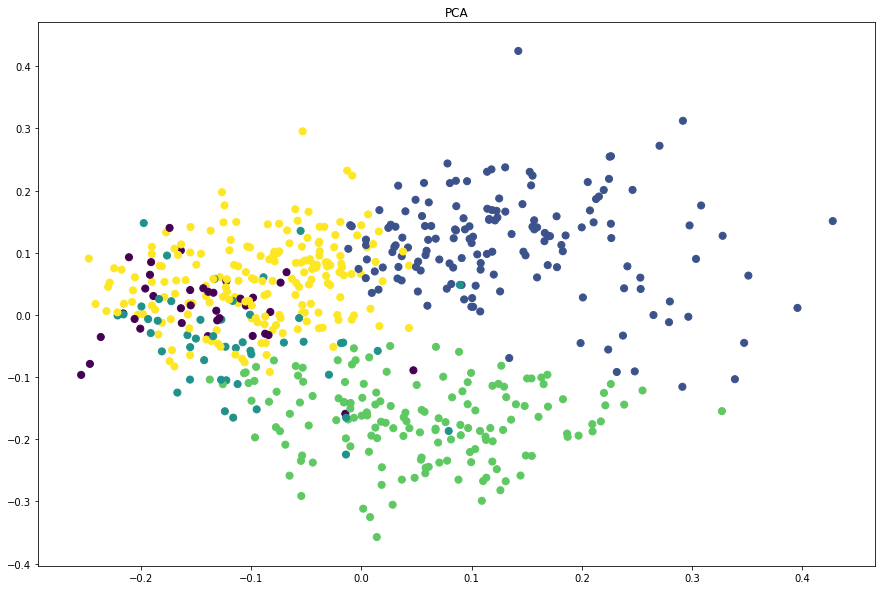

In [89]:
Y, prediction = KMeans_all(raw_text, 10)
plot_PCA(Y, prediction)

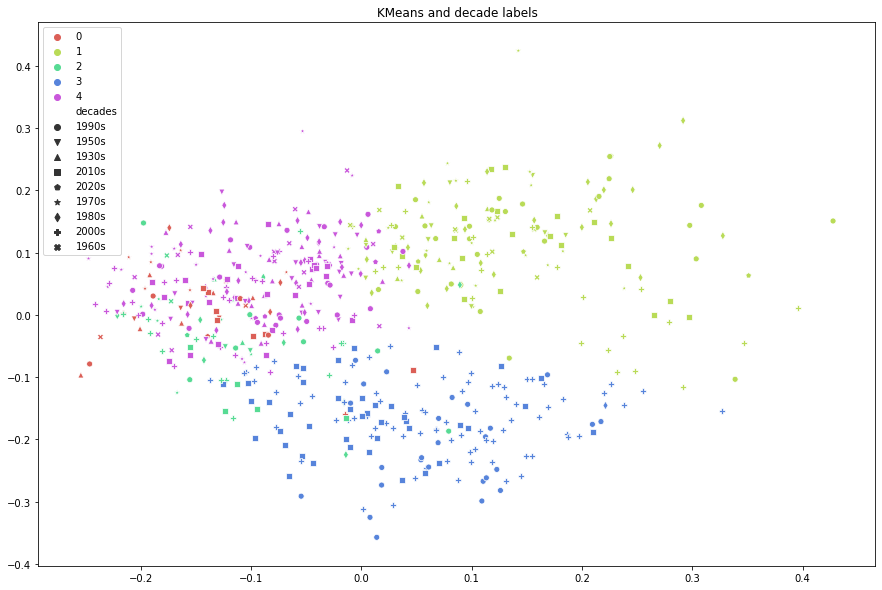

In [90]:
plot_kmeans_plus_labels(Y, prediction, songs.decades)

### KMeans mit POS

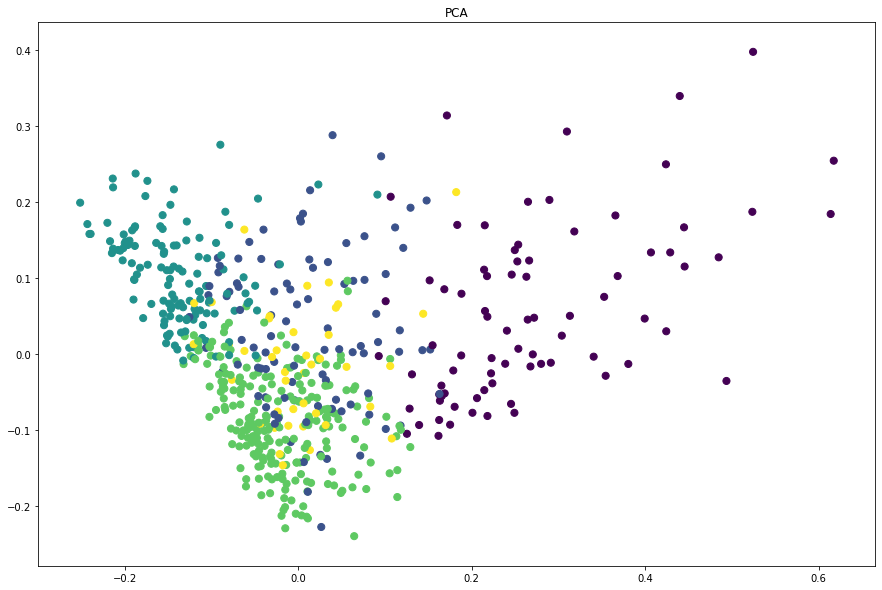

In [91]:
Y, prediction = KMeans_all(POS, 10)
plot_PCA(Y, prediction)

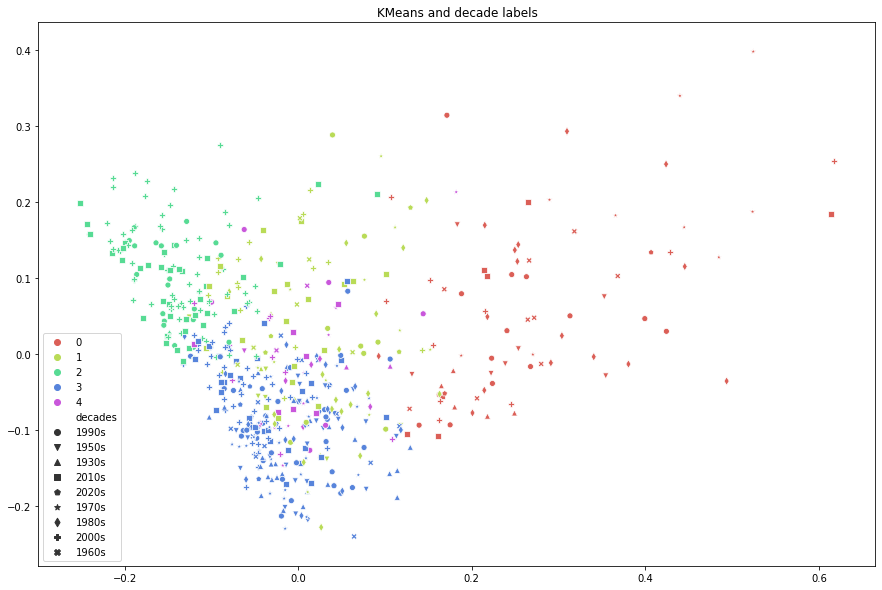

In [92]:
plot_kmeans_plus_labels(Y, prediction, songs.decades)

### KMeans mit stemmed text

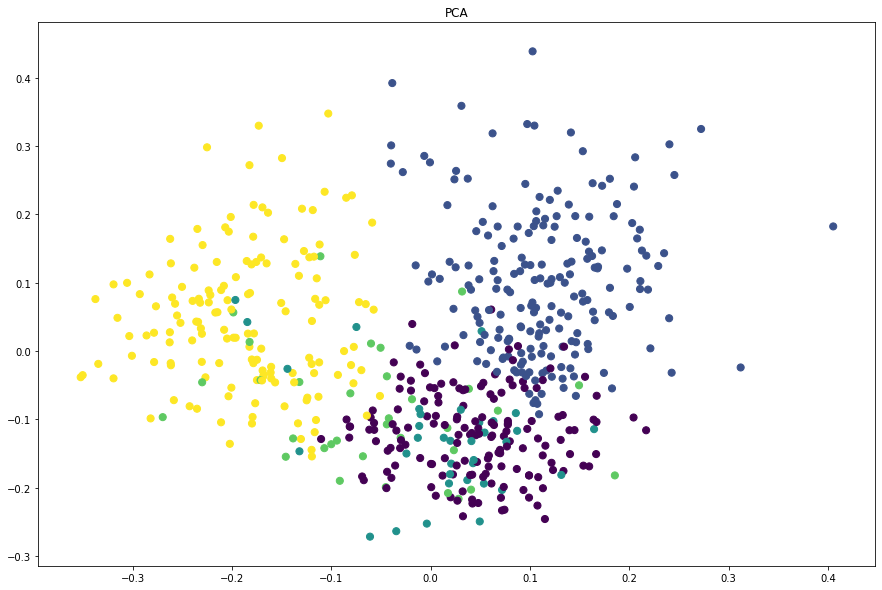

In [93]:
Y, prediction = KMeans_all(stemmed, 10)
plot_PCA(Y, prediction)

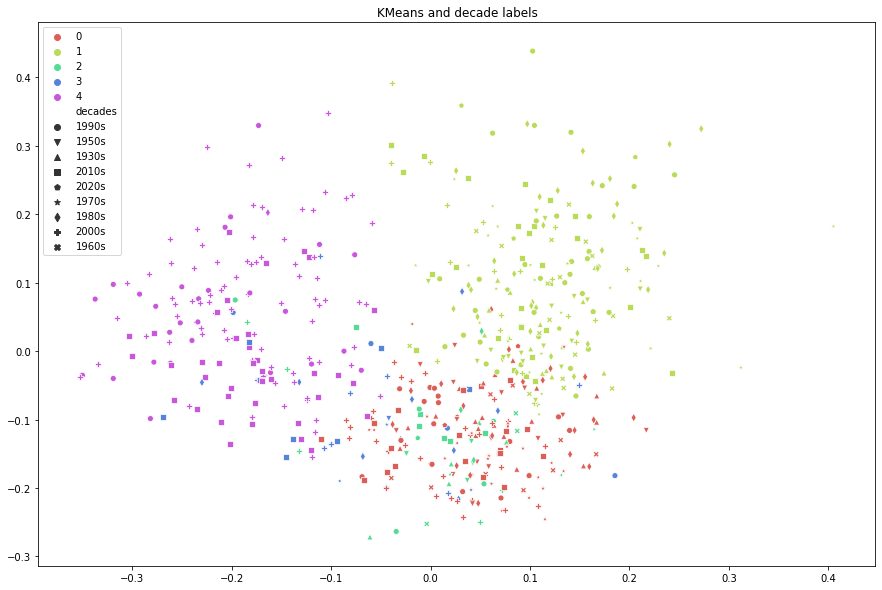

In [94]:
plot_kmeans_plus_labels(Y, prediction, songs.decades)

### KMeans mit stemmed text ohne Pop und Rock (sowohl Genre1 als auch Genre2) nach Genres

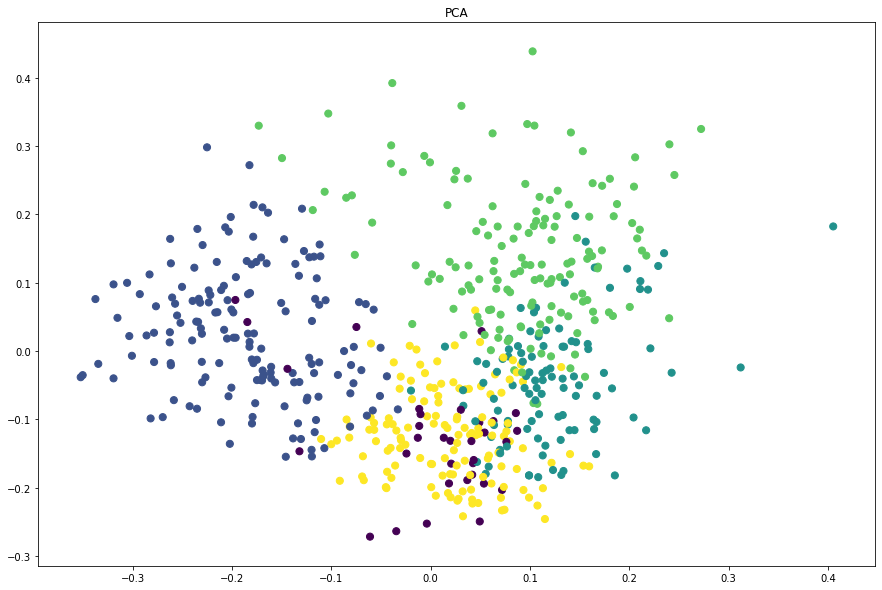

In [96]:
Y, prediction = KMeans_all(stemmed, 5)
plot_PCA(Y, prediction)

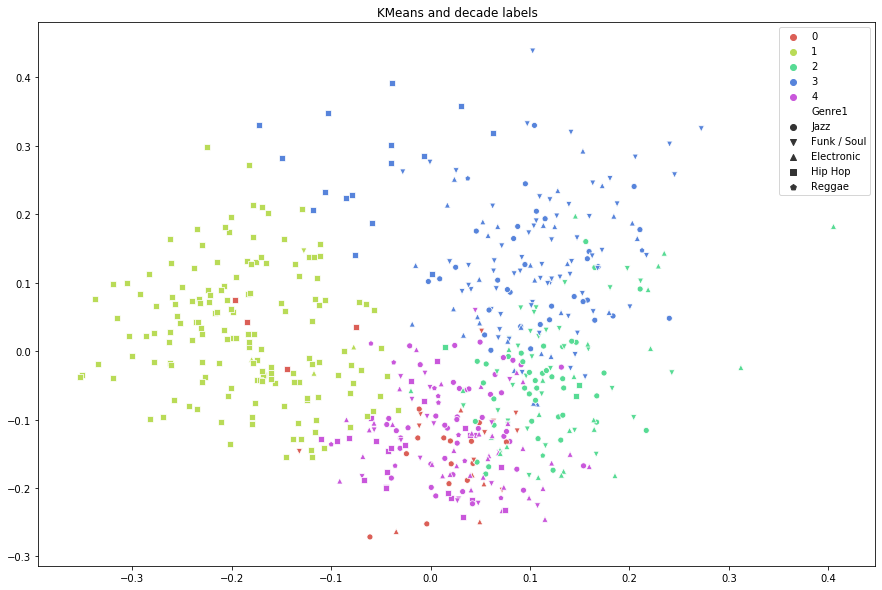

In [97]:
plot_kmeans_plus_labels(Y, prediction, songs.Genre1)

### KMeans ohne Pop und Rock für eine Dekade

In [100]:
nineties = songs[songs.decades=='1990s']
nineties.head()

,Unnamed: 0,Unnamed: 0.1,song,artist,text,stemmed_text,POS,number_of_tokens,Genre1,Genre2,date,decades
51,603,603,A Fine Romance,Billie Holiday,a fine romance with no kisses a fine romance...,"A fine romanc , with no kiss A fine romanc , ...",fine fine hot cold fine fine old fine fine goo...,693,Jazz,Blues,1992,1990s
57,609,609,Billie Blues,Billie Holiday,billie holiday lord i love my man tell the...,"billi holiday lord I love my man , tell the w...",blue dark black many long long happy good man ...,598,Jazz,Blues,1997,1990s
61,613,613,Embraceable You,Billie Holiday,embrace me my sweet embraceable you embrace ...,embrac me My sweet embrac you embrac me My ir...,sweet irreplaceable tipsy many naughty sweet m...,503,Jazz,Blues,1997,1990s
72,624,624,Gone With The Wind,Billie Holiday,gone with the wind just like a leaf that has ...,gone with the wind just like a leaf that ha b...,empty wind leaf wind romance yesterday lifetim...,427,Jazz,Blues,1992,1990s
81,633,633,"Me, Myself And I",Billie Holiday,me myself and i are all in love with you we...,"Me , myself and I are all in love with you We...",wonderful convinced dear satisfied wonderful c...,826,Jazz,Blues,1996,1990s


In [101]:
dec_raw_text = nineties['text']
dec_POS = nineties['POS']
dec_stemmed = nineties['stemmed_text']

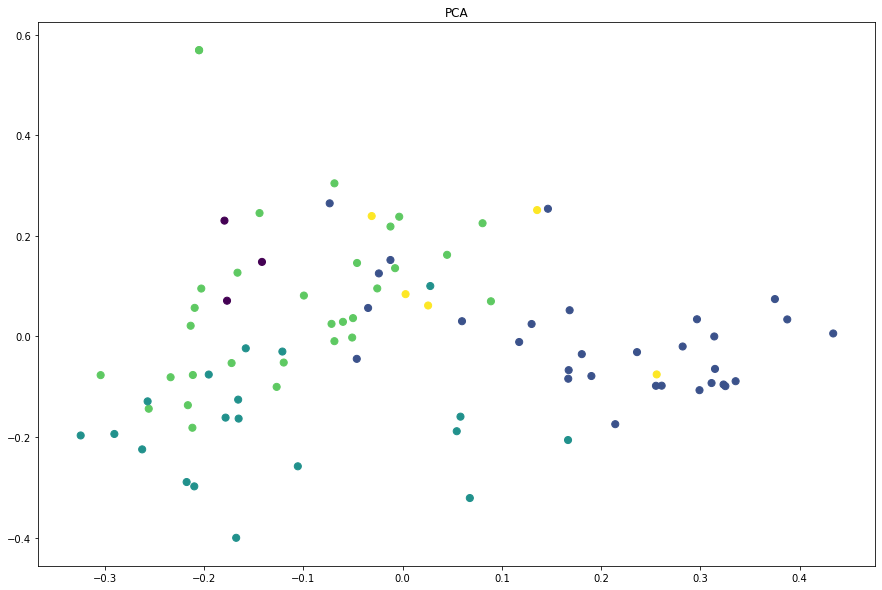

In [103]:
Y, prediction = KMeans_all(dec_stemmed, 5)
plot_PCA(Y, prediction)

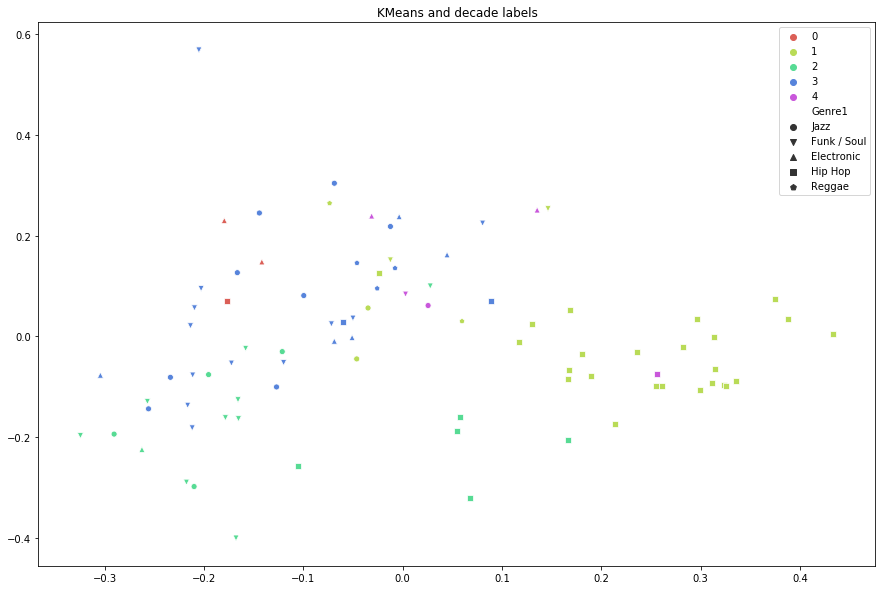

In [105]:
plot_kmeans_plus_labels(Y, prediction, nineties.Genre1)

### nur HipHop, Electronic und Folk

In [106]:
songs = songs[songs.Genre1 != "Funk / Soul"]
songs = songs[songs.Genre1 != "Jazz"]
songs = songs[songs.Genre1 != "Reggae"]
songs = songs[songs.Genre1 != "Stage & Screen"]
songs = songs[songs.Genre2!=' Rock']
songs = songs[songs.Genre2!=' Pop']
songs.head()

,Unnamed: 0,Unnamed: 0.1,song,artist,text,stemmed_text,POS,number_of_tokens,Genre1,Genre2,date,decades
349,2043,2043,A Runner With The Pack,Donna Summer,he's got a second side he's got sixth sense h...,He 's got a second side he 's got sixth sens ...,second sixth astute acute sure eloquent intell...,1231,Electronic,Funk / Soul,1996,1990s
350,2044,2044,Autumn Changes,Donna Summer,this love of ours is gradually fading someth...,thi love of our Is gradual fade someth is wro...,wrong many many worth love Something somebody ...,1132,Electronic,Funk / Soul,1976,1970s
351,2045,2045,Back In Love Again,Donna Summer,lately i'm feeling glad i'm alive 'cause when...,late I 'm feel glad I 'm aliv 'caus when I 'm...,glad alive good crazy crazy right wrong real s...,1340,Electronic,Funk / Soul,1977,1970s
352,2046,2046,Bad Girls,Donna Summer,bad girls talking about the sad girls sad gi...,bad girl talk about the sad girl sad girl tal...,Bad sad Sad bad right tight good Bad sad Sad b...,1064,Electronic,Funk / Soul,1979,1970s
353,2047,2047,Be Myself Again,Donna Summer,let me introduce myself i'm a woman that you'...,let me introduc myself I 'm a woman that you ...,own real loud woman someone everything game so...,1186,Electronic,Funk / Soul,2008,2000s


In [107]:
less_raw_text = songs['text']
less_POS = songs['POS']
less_stemmed = songs['stemmed_text']

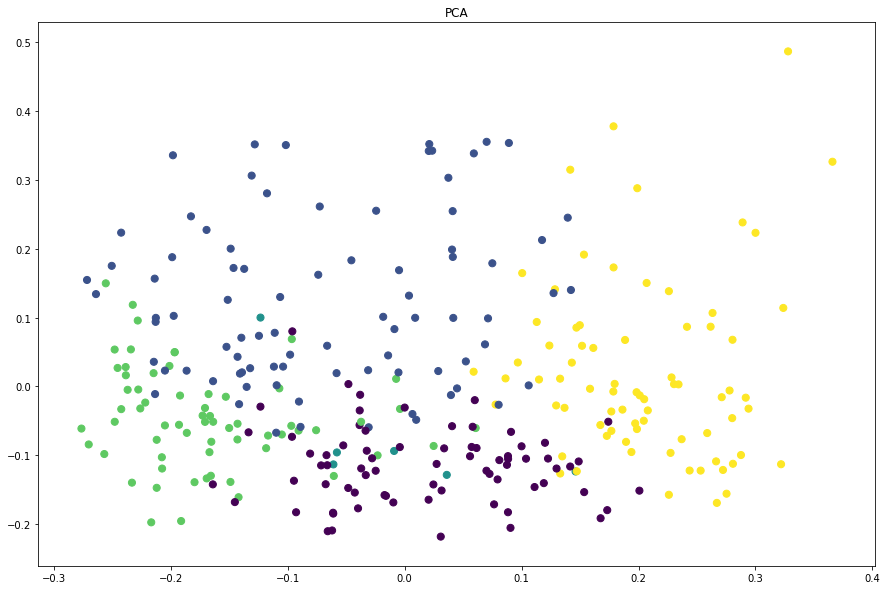

In [108]:
Y, prediction = KMeans_all(less_stemmed, 3)
plot_PCA(Y, prediction)

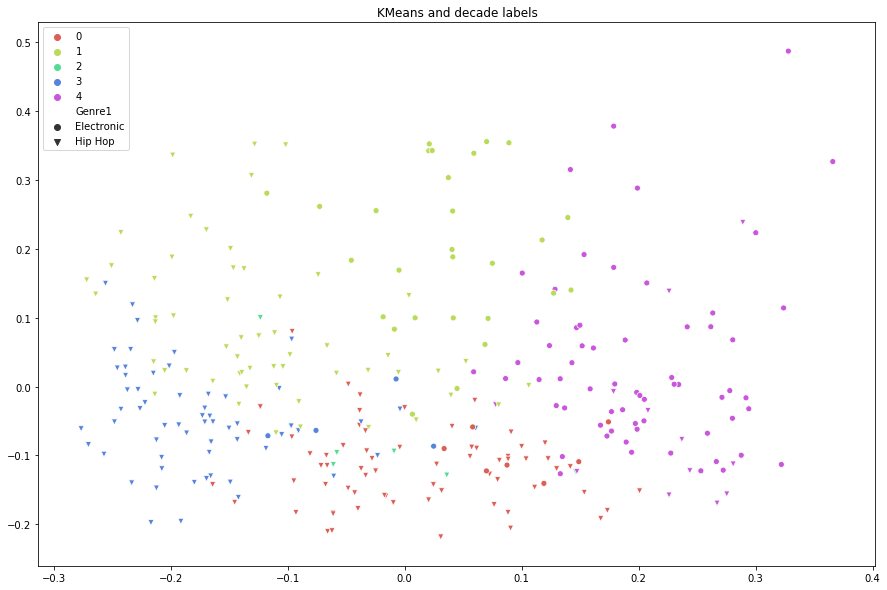

In [109]:
plot_kmeans_plus_labels(Y, prediction, songs.Genre1)

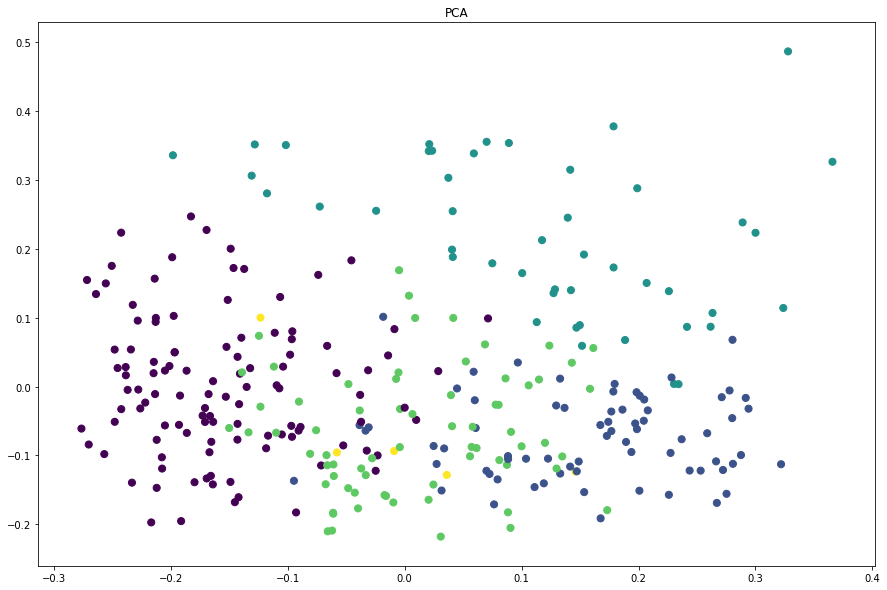

In [110]:
Y, prediction = KMeans_all(less_stemmed, 10)
plot_PCA(Y, prediction)

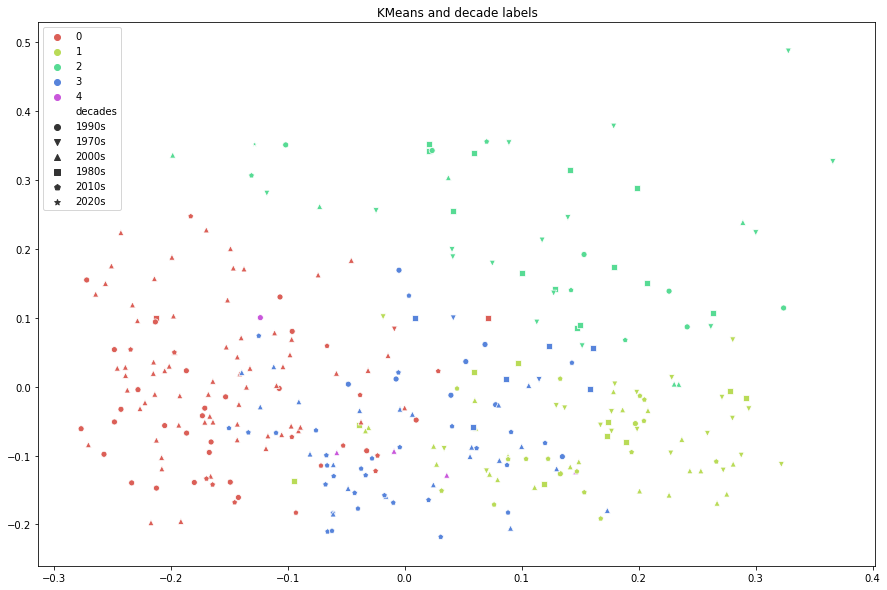

In [111]:
plot_kmeans_plus_labels(Y, prediction, songs.decades)

### nur HipHop, Electronic und Folk und 90er

In [112]:
nineties = songs[songs.decades=='1990s']
nineties.head()

,Unnamed: 0,Unnamed: 0.1,song,artist,text,stemmed_text,POS,number_of_tokens,Genre1,Genre2,date,decades
349,2043,2043,A Runner With The Pack,Donna Summer,he's got a second side he's got sixth sense h...,He 's got a second side he 's got sixth sens ...,second sixth astute acute sure eloquent intell...,1231,Electronic,Funk / Soul,1996,1990s
357,2051,2051,Get Ethnic,Donna Summer,rap: lying here in the sun just trying to g...,( rap : ) ly here in the sun just tri to get ...,different alright Ethnic ethnic ethnic ethnic ...,1276,Electronic,Funk / Soul,1991,1990s
359,2053,2053,Highway Runner,Donna Summer,highway lead him to where he's never been sho...,highway lead him to where he 's never been sh...,stray restless same Highway drifter stray cat ...,719,Electronic,Funk / Soul,1996,1990s
416,2387,2387,If I Had...,Eminem,life by marshal mathers what is life? life ...,life By marshal mather what is life ? life is...,big damn secret true funny evil same tired tir...,3973,Hip Hop,Electronic,1999,1990s
417,2388,2388,Infinite,Eminem,oh yeah this is eminem baby back up in that...,"Oh yeah , thi is eminem babi , back up in tha...",fucking relaxing spinal barren infinite infini...,3802,Hip Hop,Electronic,1996,1990s


In [114]:
nineties_raw_text = songs['text']
nineties_POS = songs['POS']
nineties_stemmed = songs['stemmed_text']

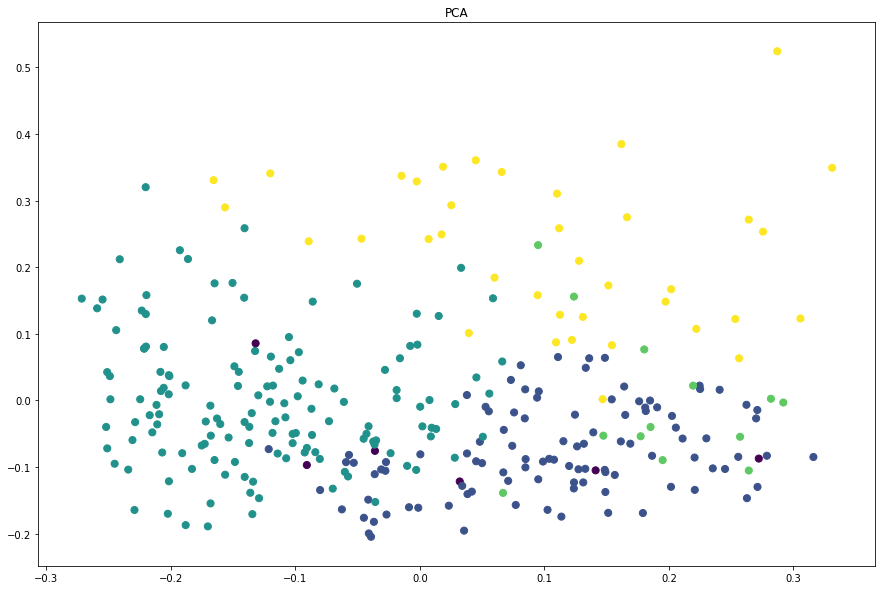

In [115]:
Y, prediction = KMeans_all(nineties_raw_text, 3)
plot_PCA(Y, prediction)

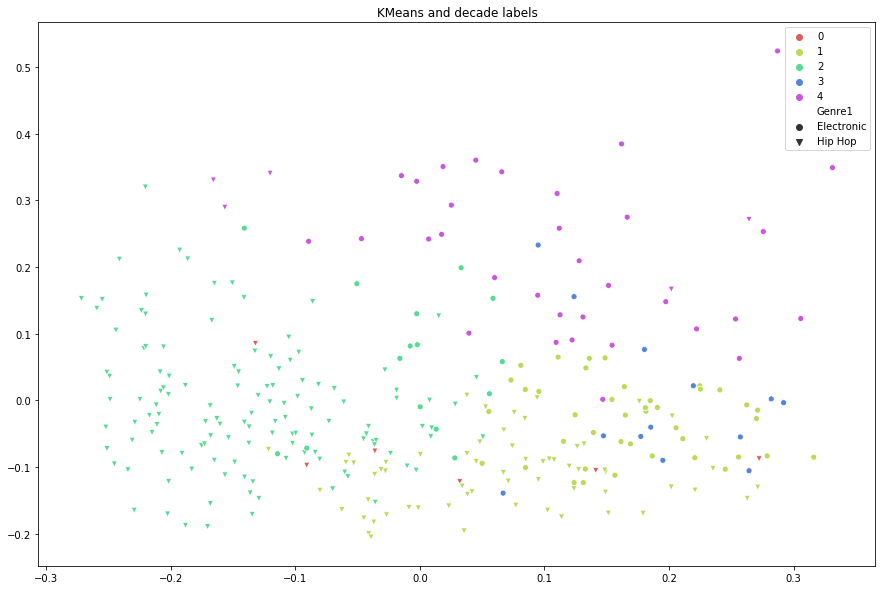

In [116]:
plot_kmeans_plus_labels(Y, prediction, songs.Genre1)

### Teste verschiedene Distanzmaße

In [34]:
def kmedoids(n_clusters, text, metric):
    kmedoids = KMedoids(n_clusters=n_clusters, metric=metric, random_state=0)
    fitted = kmedoids.fit(text)
    prediction = kmedoids.predict(text)
    return prediction

In [35]:
def Kmedoids_all(text, n_clusters, metric):
    data = tfidf(text)
    prediction = kmedoids(n_clusters,data, metric)
    Y = compute_PCA(data)
    return Y, prediction

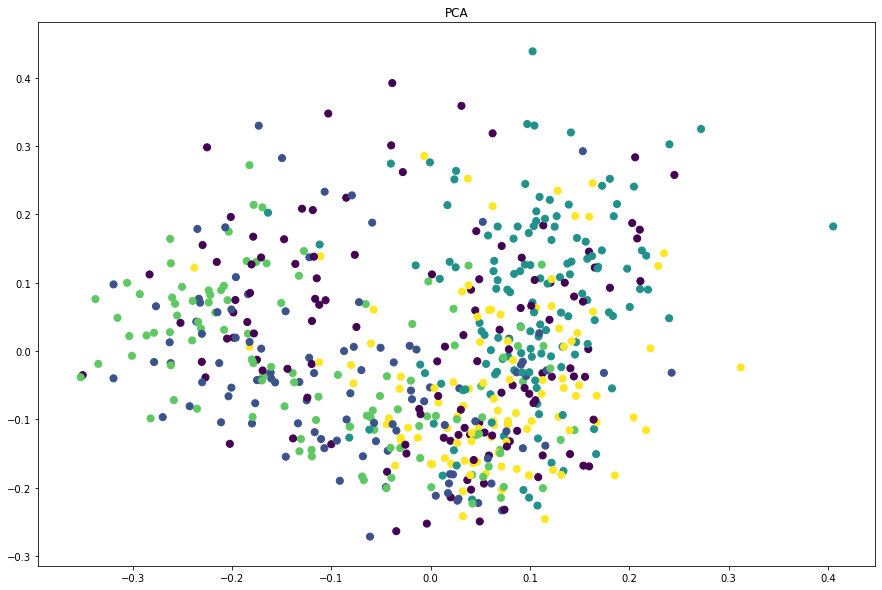

In [122]:
Y, prediction = Kmedoids_all(stemmed, 5, 'cosine')
plot_PCA(Y, prediction)

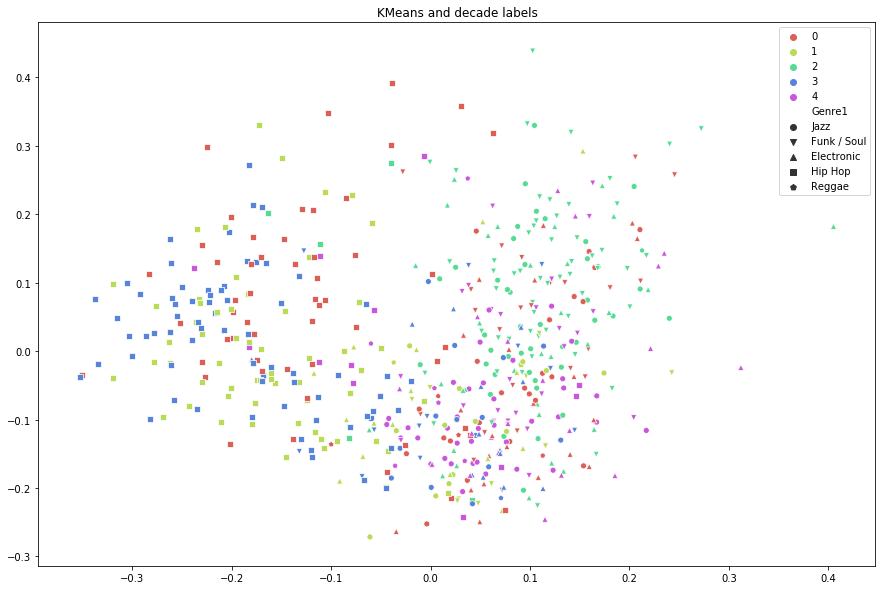

In [123]:
plot_kmeans_plus_labels(Y, prediction, songs.Genre1)

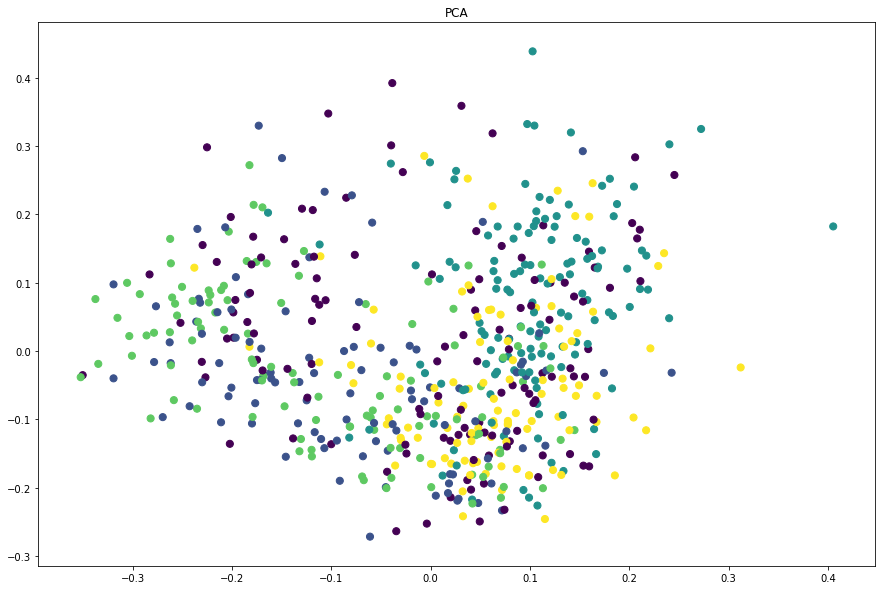

In [124]:
Y, prediction = Kmedoids_all(stemmed, 5, 'euclidean')
plot_PCA(Y, prediction)

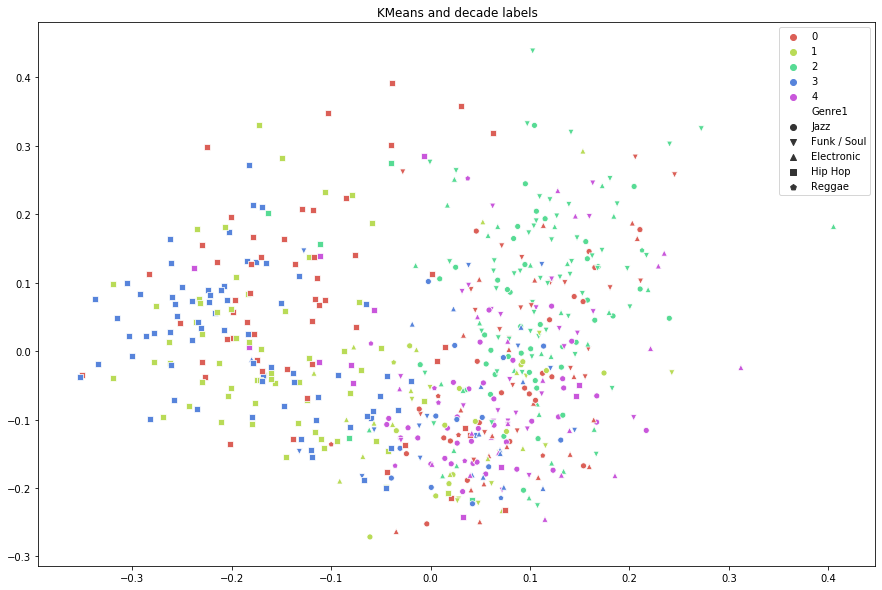

In [125]:
plot_kmeans_plus_labels(Y, prediction, songs.Genre1)